# Explore - Time Series
Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the *store item demand dataset* and the *opsd dataset*.

- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 
- For both datasets you should choose a method of splitting your data and only explore the training split.

In [98]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# set plt and seaborn defaults
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style('darkgrid')

# import custom modules
import acquire_func as a
import prepare as p

## Item Demand Data Exploration 

ToDo:
- Aggriga
- Univariate exploration
    - Look at data for split
- Split Data
- Multivariate Exploration

In [2]:
# get prepared data
df = p.prepare_sales_data()

In [6]:
df.columns

Index(['item', 'sale_amount', 'sale_id', 'store', 'item_brand', 'item_name',
       'item_price', 'item_upc12', 'item_upc14', 'store_address', 'store_city',
       'store_state', 'store_zipcode', 'day_of_week', 'month', 'sales_total'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  object 
 8   item_upc14     913000 non-null  object 
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  object 
 13  day_of_week    913000 non-null  object 
 14  month          913000 non-null  int64  
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(4), obj

In [10]:
# there are 1826 dates
df.index.nunique()

1826

In [11]:
# looks like there are 500 entries for each date
df.index.value_counts()

2015-01-30 00:00:00+00:00    500
2017-02-09 00:00:00+00:00    500
2016-08-30 00:00:00+00:00    500
2013-04-10 00:00:00+00:00    500
2015-08-18 00:00:00+00:00    500
                            ... 
2017-12-29 00:00:00+00:00    500
2015-04-07 00:00:00+00:00    500
2016-06-10 00:00:00+00:00    500
2014-09-30 00:00:00+00:00    500
2017-07-04 00:00:00+00:00    500
Name: sale_date, Length: 1826, dtype: int64

In [29]:
# use resample and sum to aggragate to one date per row
df2 = df.resample('D').sum()
df2.head()

,item,sale_amount,sale_id,store,item_price,month,sales_total
sale_date,,,,,,,
2013-01-01 00:00:00+00:00,12750,13696.0,227794000,2750,2580.2,500,73844.01
2013-01-02 00:00:00+00:00,12750,13678.0,227794500,2750,2580.2,500,73570.58
2013-01-03 00:00:00+00:00,12750,14488.0,227795000,2750,2580.2,500,78169.48
2013-01-04 00:00:00+00:00,12750,15677.0,227795500,2750,2580.2,500,84467.73
2013-01-05 00:00:00+00:00,12750,16237.0,227796000,2750,2580.2,500,87621.85


In [30]:
# drop all columns except sales_total
df2 = df2.drop(columns=['item', 'sale_amount', 'sale_id', 'store', 'item_price', 'month'])
df2.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


### Train test split
- overview of what data I have
- choose method to split
    - ended up choosing human method and putting the last year of available data in to the test set (2017)

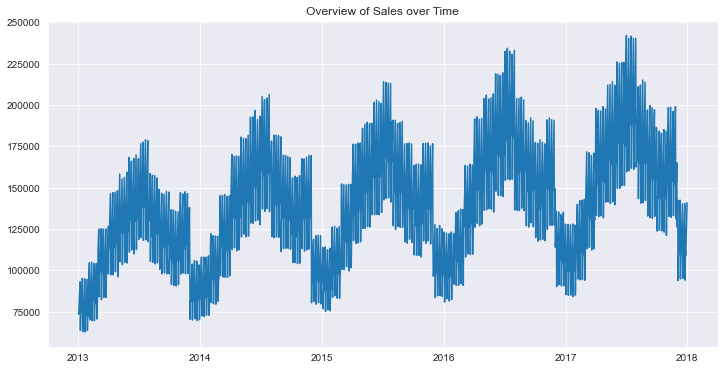

In [99]:
# quick overvew of what data I have before split
plt.plot(df2)
plt.title('Overview of Sales over Time')
plt.show()

In [41]:
# split into train test
# use human method, one year

# create mask for train set (anything less than 2017)
df2[df2.index.year < 2017]

# assign to variable train
train = df2[df2.index.year < 2017]

#create mask for test set (anything in the year 2017)
df2[df2.index.year == 2017]

# assign to variable test
test = df2[df2.index.year == 2017]

In [44]:
# have two dataframes, train with 1461 rows (aka 4 years)
# test with 365 rows (aka 1 year)
train.shape, test.shape

((1461, 1), (365, 1))

### Explore Train
- Don't take time series into account
- look for seasons
- plot lag
- plot rolling averages

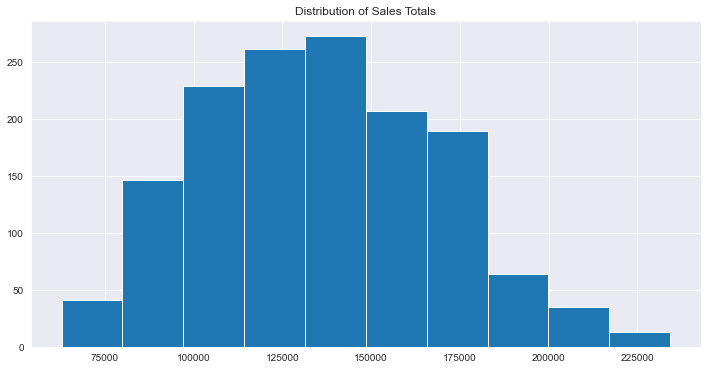

In [100]:
plt.hist(train.sales_total)
plt.title("Distribution of Sales Totals")
plt.show()

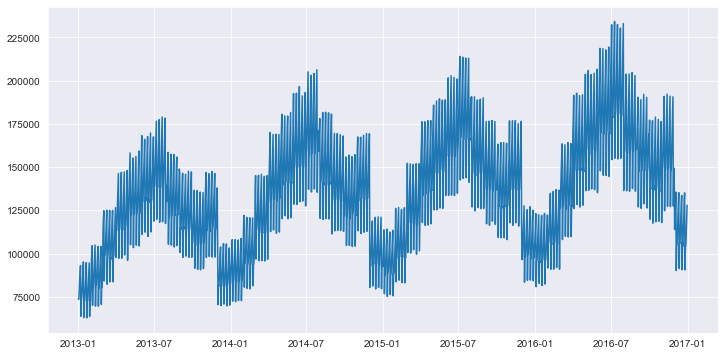

In [101]:
plt.plot(train)

<AxesSubplot:title={'center':'Weekly average'}, xlabel='sale_date'>

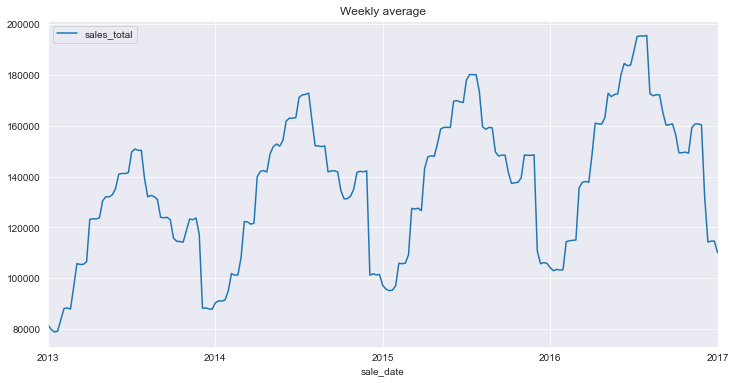

In [102]:
# resample over 1 week period 
train.resample('W').mean().plot(title='Weekly average')

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

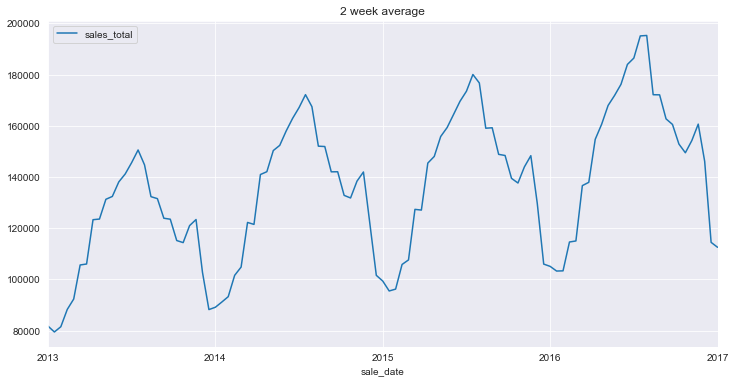

In [103]:
# Resample over 2 week period
train.resample('2W').mean().plot(title='2 week average')

<AxesSubplot:title={'center':'Month average'}, xlabel='sale_date'>

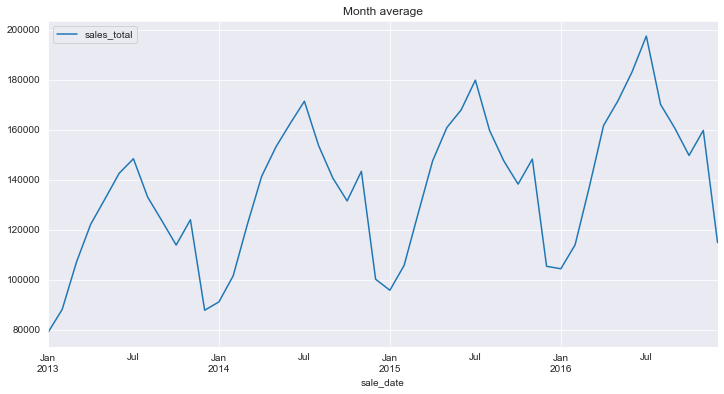

In [104]:
# resample over Month period
train.resample('M').mean().plot(title='Month average')

In [61]:
# assign target variable and index to a series 
y = train.sales_total

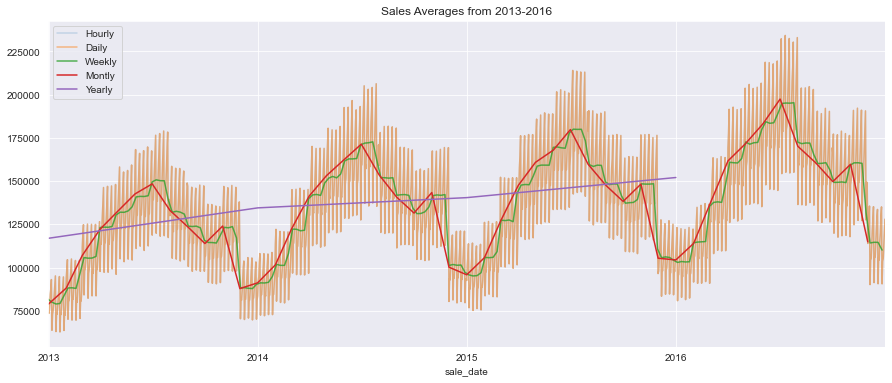

In [105]:
plt.figure(figsize = (15,6))
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title("Sales Averages from 2013-2016")
plt.show()

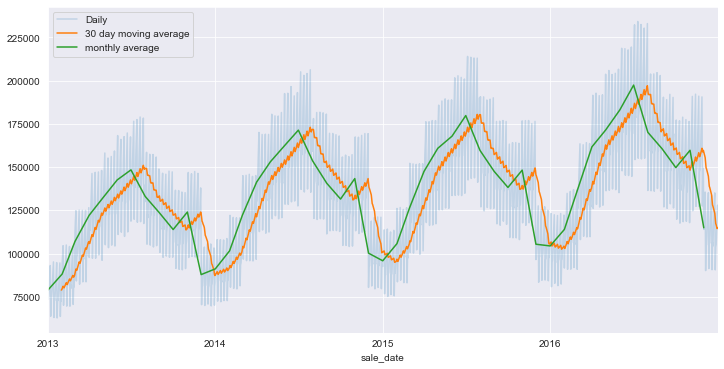

In [117]:
# moving average
ax = y.resample('D').mean().plot(label='Daily', alpha=.2)
y.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 day moving average')
y.resample('M').mean().plot(ax=ax, label='monthly average')
ax.legend()
plt.show()

### Takeaways
- Although the pattern of sales over the year stays remarkably similar, it seems total sales seem to be increasing over time
- Potential contributing factors could be but are not limited to: HEB selling more product, steady increase of price of goods, or inflation.
- This isn't profit so there is no way to tell if this increase in total sales is resulting in a higher profit. 

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

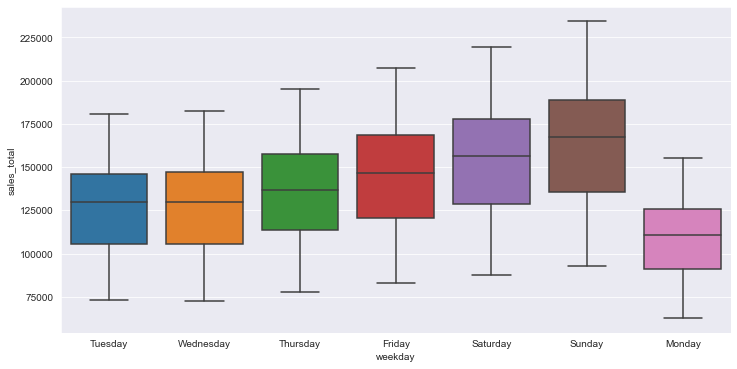

In [106]:
# box plot of sales day of the week

(
    y.reset_index()
    .assign(weekday=lambda df: df.sale_date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='sales_total', x='weekday')
)


### Takeaways
- looks like sales are on average higher on Sunday. Makes sense. Grocery store is usually pretty crowded on that day
- That's the day you want to put your samples out

<AxesSubplot:title={'center':'Average week-to-week change in total sales'}, xlabel='sale_date'>

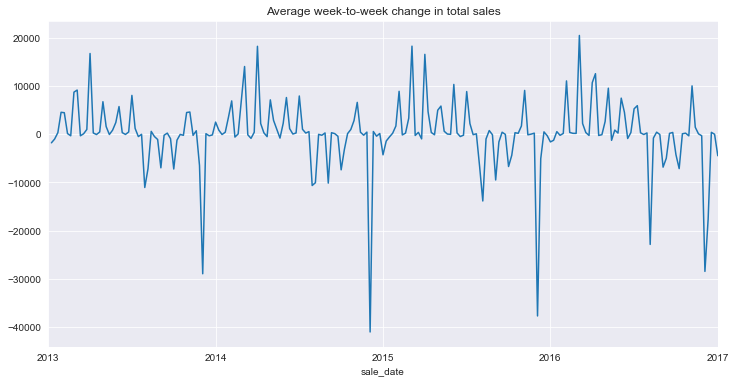

In [108]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in total sales')


<AxesSubplot:title={'center':'Average month-to-month change in total sales'}, xlabel='sale_date'>

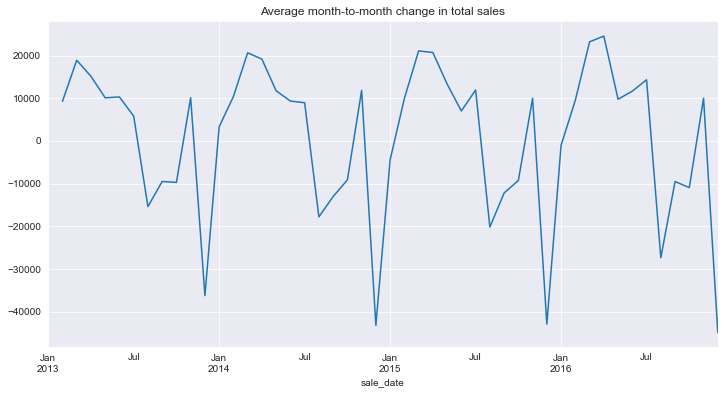

In [109]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in total sales')

<AxesSubplot:title={'center':'Average 2 Week change in total sales'}, xlabel='sale_date'>

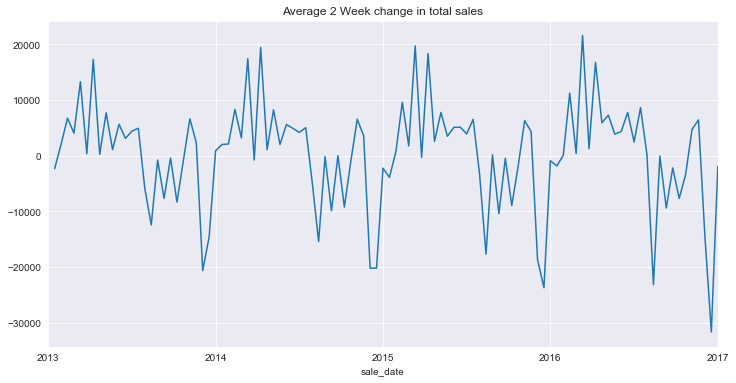

In [114]:
y.resample('2W').mean().diff().plot(title='Average 2 Week change in total sales')

### Takeaways
- With week to week, every two weeks, month to month, patterns seem consistant
- big dip around end of December

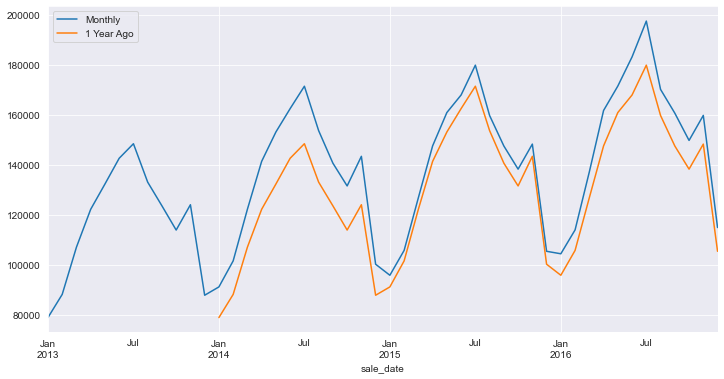

In [119]:
# use .shift to overlay monthly sales from each year over the year before
ax = y.resample('M').mean().plot(label='Monthly')
y.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend()

<AxesSubplot:xlabel='t', ylabel='t + 1'>

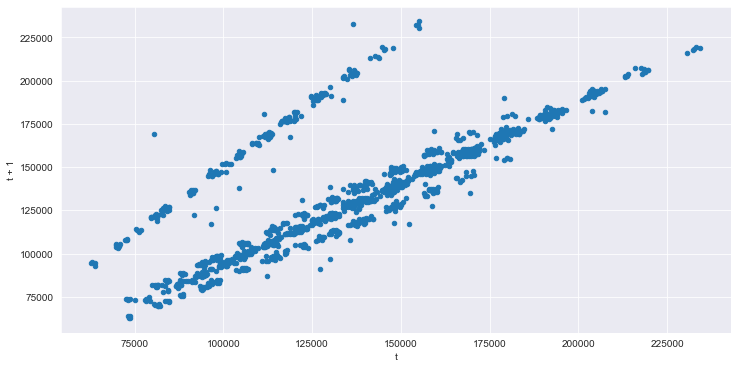

In [120]:
pd.concat([y.rename('t'), y.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t')

<AxesSubplot:xlabel='t', ylabel='t + 1'>

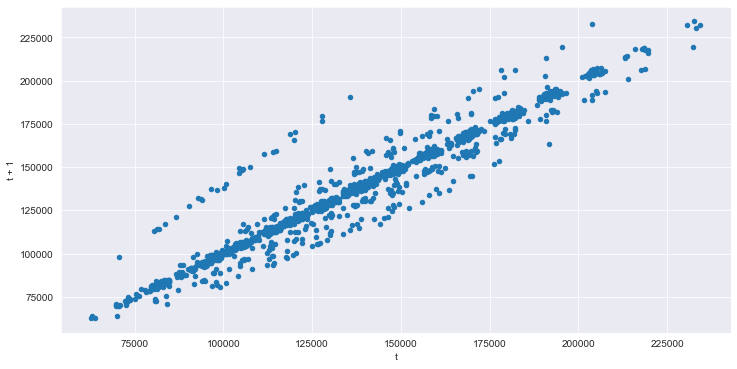

In [122]:
pd.concat([y.rename('t'), y.shift(7).rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t')

Text(0.5, 1.0, 'Lag plot with lag=1')

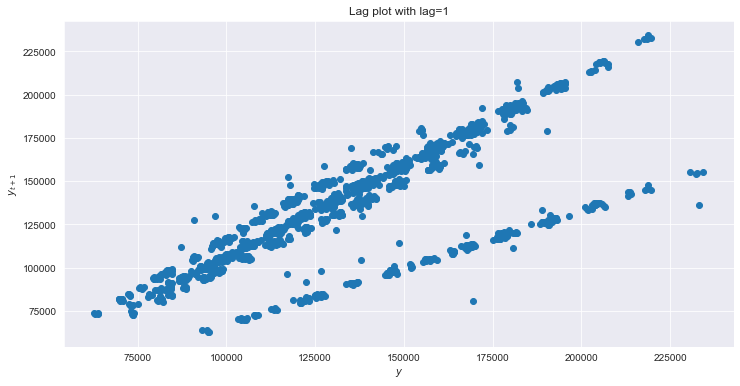

In [123]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<AxesSubplot:xlabel='this_week', ylabel='the_next_week'>

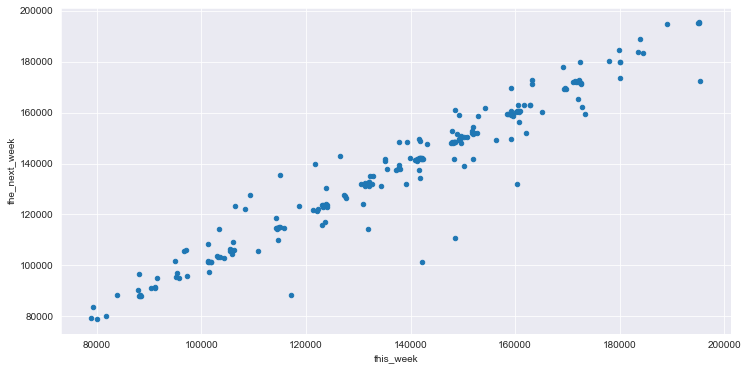

In [126]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

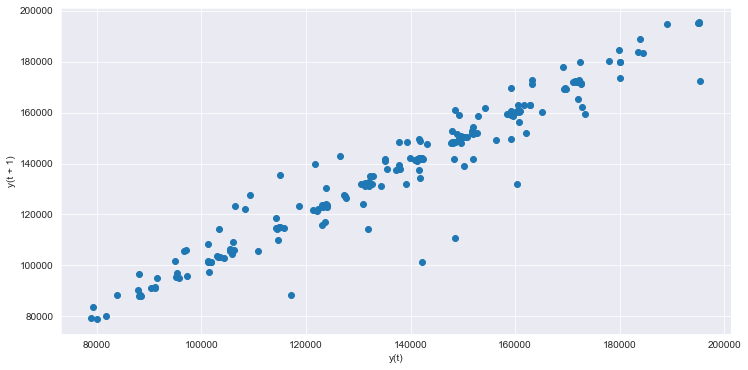

In [127]:
pd.plotting.lag_plot(y.resample('W').mean(), 1)

In [129]:
def correlation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [130]:
autocorr = pd.Series({lag: correlation(y.resample('D').mean(), lag) for lag in range(1, 365)})
autocorr

1      0.749055
2      0.666375
3      0.584752
4      0.579596
5      0.651134
         ...   
360    0.528739
361    0.532324
362    0.620704
363    0.708153
364    0.978403
Length: 364, dtype: float64

<AxesSubplot:>

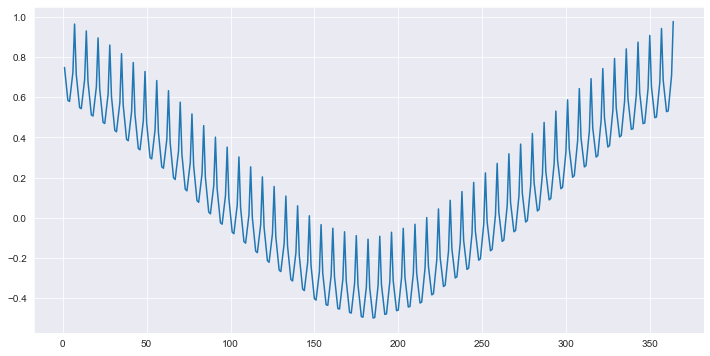

In [131]:
autocorr.plot()

<AxesSubplot:>

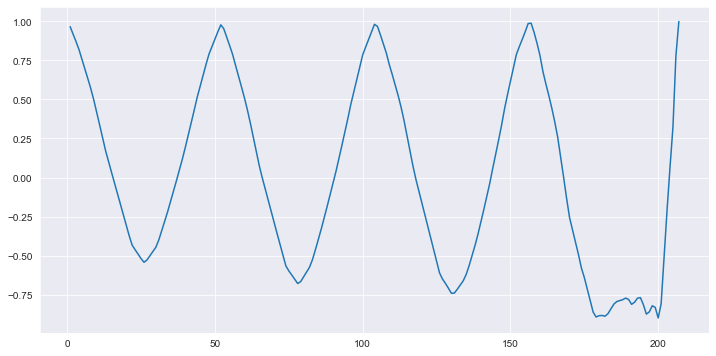

In [139]:
autocorr = pd.Series({lag: correlation(y.resample('W').mean(), lag) for lag in range(1, 365)})
autocorr.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

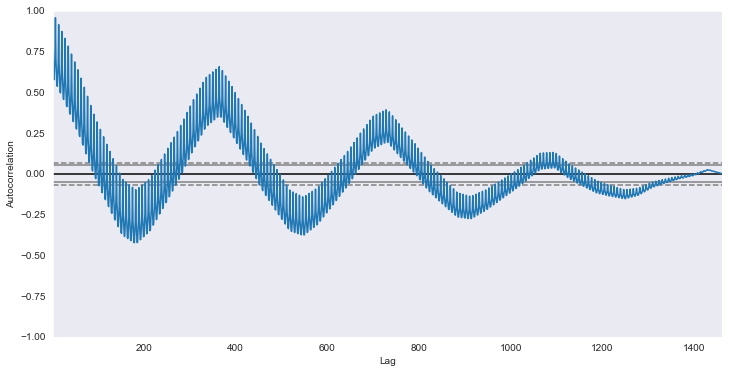

In [133]:
pd.plotting.autocorrelation_plot(y.resample('D').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

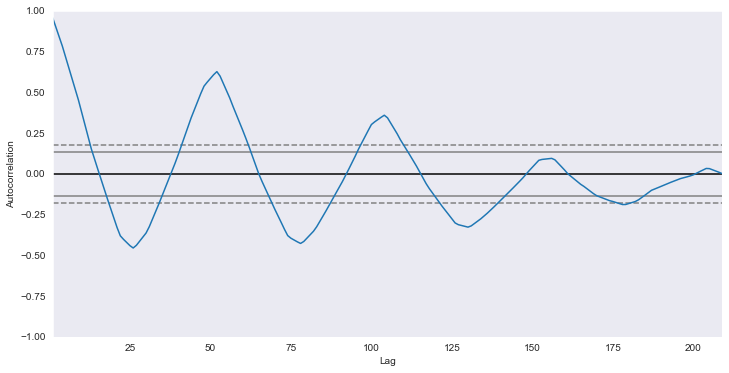

In [134]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

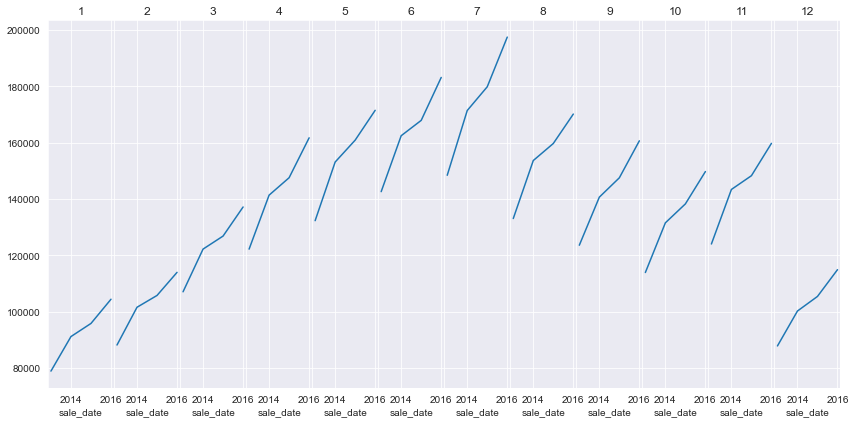

In [140]:
# seasonal subseries plot. Broken down by month
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, y.groupby([y.index.year, y.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='sale_date'>

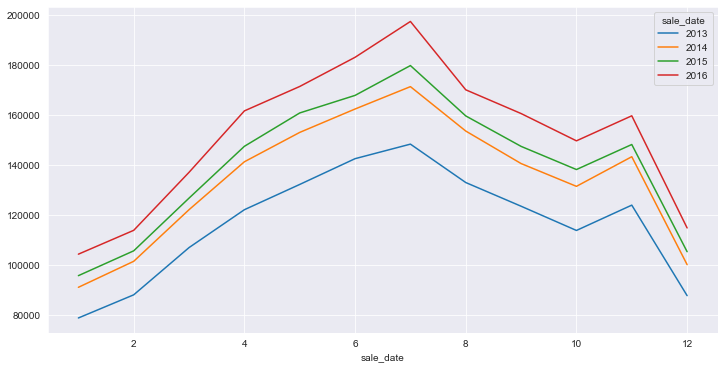

In [142]:
# seasonal plot.
# the plot of each year's series. 
# looks like there's a peak around july 4th, and another little uptick around Thanksgiving
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

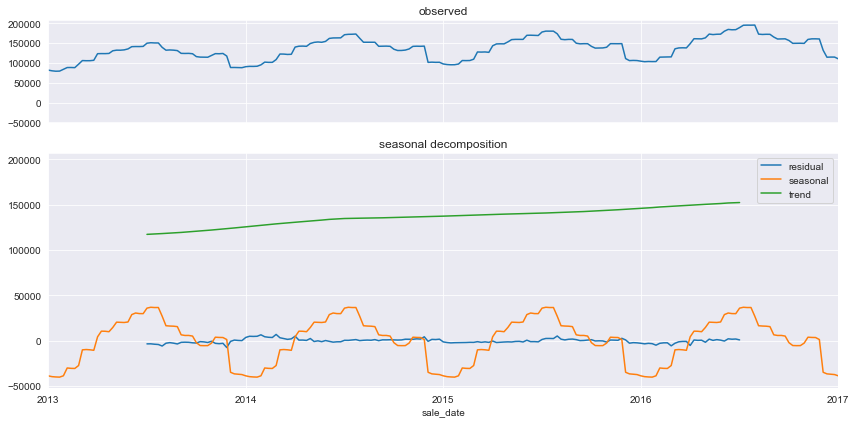

In [146]:
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(y.resample('W').mean(), model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

## Germany OPSD Data
- Explore not including time 
- Split Data
- Look Lag, Autocorrelation, Seasonal Subseries, Box Plot, Resample overlay, Seasonal overlay  

In [185]:
# get German dataset using prep function
dfg = p.prep_germany_data()

In [148]:
dfg.head()

,Consumption,Wind,Solar,wind_and_solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


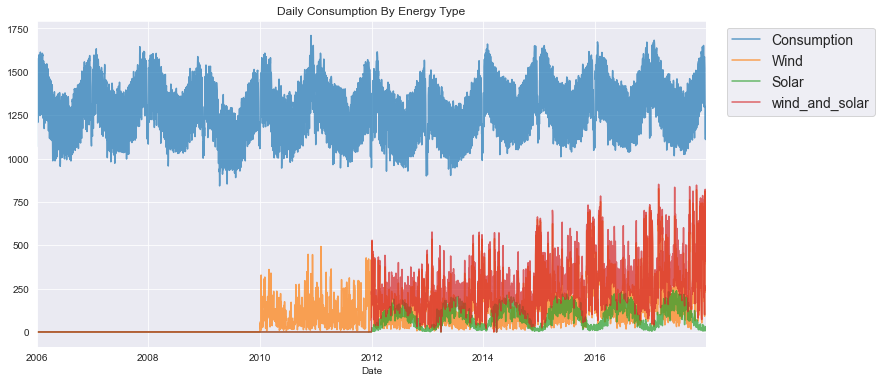

In [163]:
dfg[['Consumption', 'Wind', 'Solar', 'wind_and_solar']].plot(title= 'Daily Consumption By Energy Type', 
                                                             alpha = 0.7)
plt.legend(bbox_to_anchor = (1.02, 1), fontsize = 14)
plt.show()

In [174]:
# Filter by everything after 2012
# This is where both wind and solar come on the scene
dfg[dfg.index.year >= 2012].head()

,Consumption,Wind,Solar,wind_and_solar,month,year
Date,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,1,2012
2012-01-02,1269.581,207.327,6.574,213.901,1,2012
2012-01-03,1334.745,473.468,24.679,498.147,1,2012
2012-01-04,1347.136,499.804,14.681,514.485,1,2012
2012-01-05,1376.658,523.851,5.071,528.922,1,2012


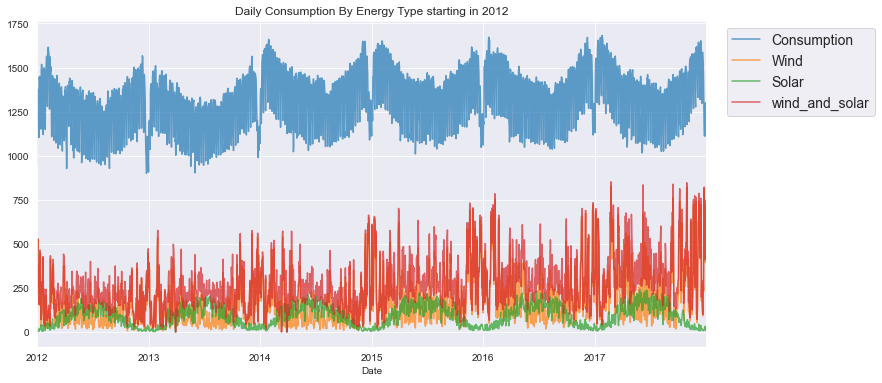

In [179]:
# plot from 2012 onward
(dfg[dfg.index.year >= 2012][['Consumption', 'Wind', 'Solar', 'wind_and_solar']]
    .plot(title= 'Daily Consumption By Energy Type starting in 2012', alpha = 0.7)
)
plt.legend(bbox_to_anchor = (1.02, 1), fontsize = 14)
plt.show()

- This is the data that I'm going to split
- This time try the percentage or the sklearn split method

In [190]:
# drop month and year column
dfg1 = dfg.drop(columns=['month', 'year'])

# only keep info from 2012 onward
dfg2 = dfg1[dfg1.index.year >= 2012]

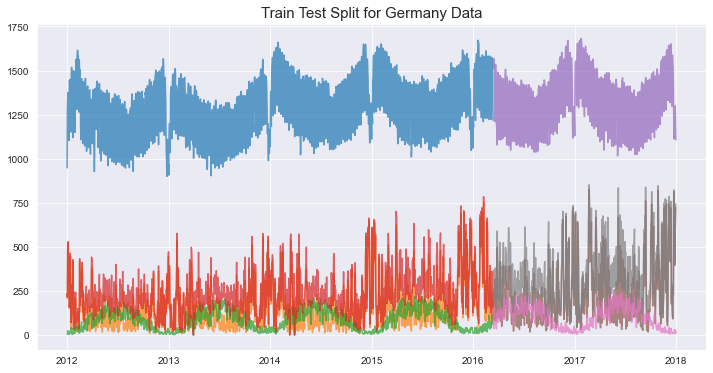

In [197]:
train_size = .70
n = dfg2.shape[0]
test_start_index = round(train_size * n)

train = dfg2[:test_start_index] # everything up (not including) to the test_start_index
test = dfg2[test_start_index:] # everything from the test_start_index to the end

plt.plot(train, alpha = 0.7)
plt.plot(test, alpha = 0.7)
plt.title('Train Test Split for Germany Data', fontsize = 15)
plt.show()

In [198]:
# set up y to be equal to consumption
y = train.Consumption

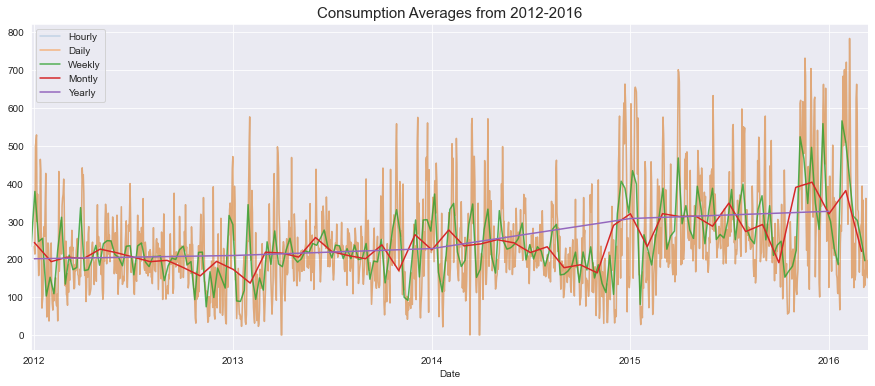

In [203]:
plt.figure(figsize = (15,6))
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title("Consumption Averages from 2012-2016", fontsize = 15)
plt.show()

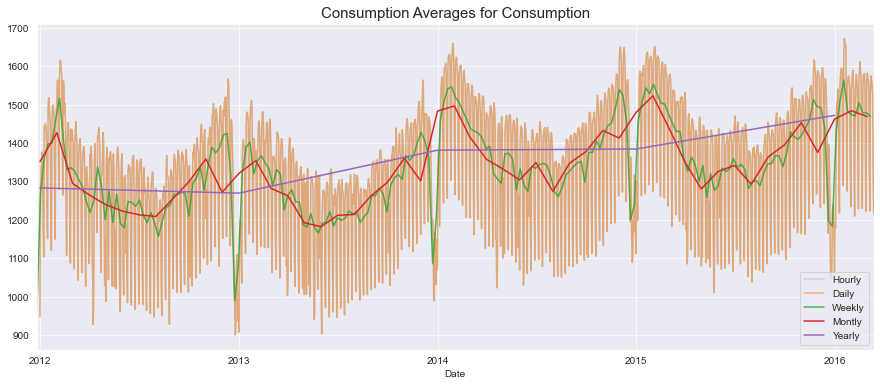

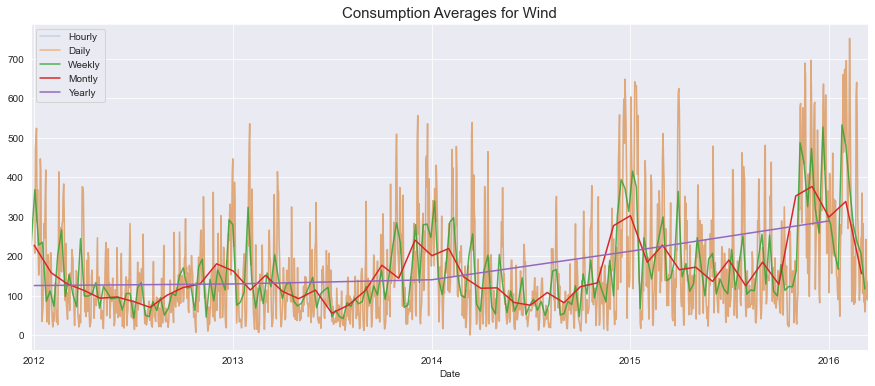

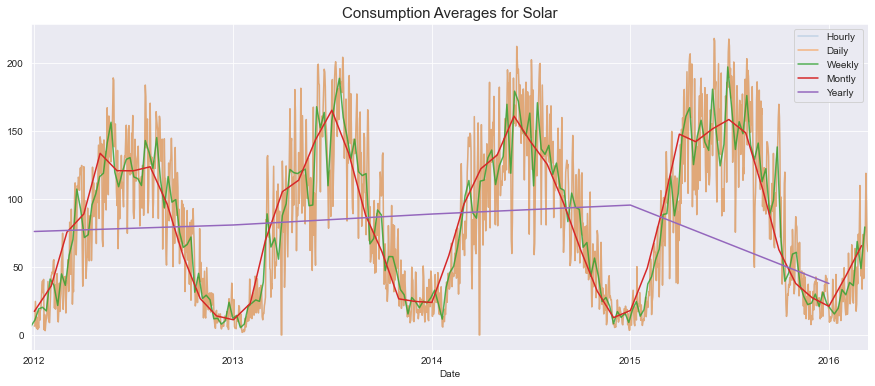

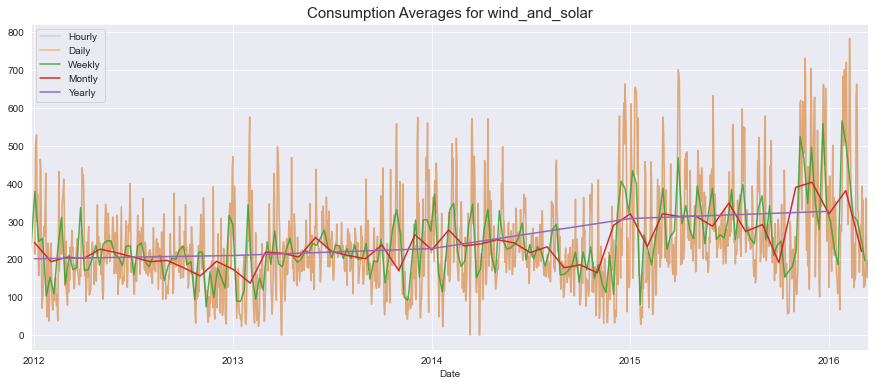

In [204]:
# set up list of column names
energy_types = list(train.columns)

# set up y to be equal to consumption
for energy in energy_types:
    
    y = train[energy]
    
    plt.figure(figsize = (15,6))
    y.plot(alpha=.2, label='Hourly')
    y.resample('D').mean().plot(alpha=.5, label='Daily')
    y.resample('W').mean().plot(alpha=.8, label='Weekly')
    y.resample('M').mean().plot(label='Montly')
    y.resample('Y').mean().plot(label='Yearly')
    plt.legend()
    plt.title(f"Consumption Averages for {energy}", fontsize = 15)
    plt.show()

### Takeaways 
- Total Consumption has a pretty recognizable pattern
- Even with the addition of Solar and Wind in 2012 this stays the same over time
- Will re split just using total consumption as a target and continue on to some more visualizations
- Solar does have a pattern which makes sense because there's more sun in the summer to generate solar power to be consumed
- The weekly average on Consumption best captures the dip that occurs yearly right at the end of the year (perhaps the Christmas holiday, no one is using the office spaces, or other work places that consume lots of energy)

In [210]:
dfg3 = dfg1['Consumption'].to_frame()

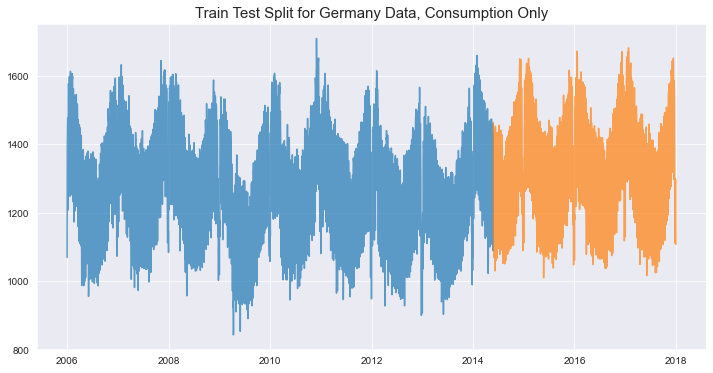

In [211]:
train_size = .70
n = dfg3.shape[0]
test_start_index = round(train_size * n)

train = dfg3[:test_start_index] # everything up (not including) to the test_start_index
test = dfg3[test_start_index:] # everything from the test_start_index to the end

plt.plot(train, alpha = 0.7)
plt.plot(test, alpha = 0.7)
plt.title('Train Test Split for Germany Data, Consumption Only', fontsize = 15)
plt.show()

In [214]:
y = train.Consumption

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

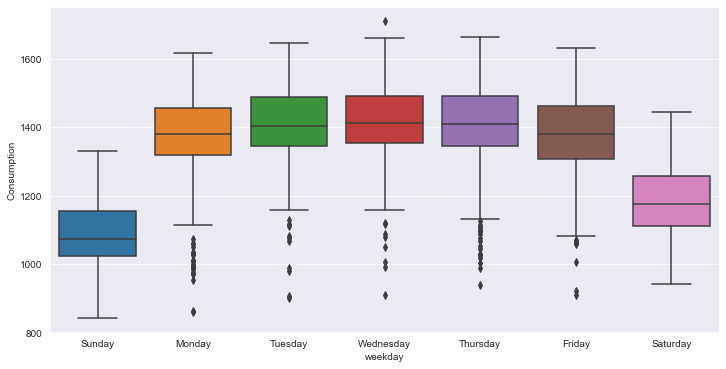

In [216]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.Date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='Consumption', x='weekday')
)

### Takeaways
- Seems like the energy consumption is higher on the weekdays than it is on the weekends
- This, at first glance, seems to support the theory I mentioned earlier that the bulk of energy consumption comes from businesses 
- I mentioned earlier that the big dip in the week before the new year could be from businesses being closed